In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive/

[Errno 2] No such file or directory: 'drive/MyDrive/'
/content/drive/MyDrive/darknet


#1. Darknet 환경 setting

In [ ]:
# 다크넷(darknet) - C, CUDA기반 오픈소스 신경망 프레임워크.
# yolo - 실시간 개체 검출 
# R-CNN보다 1000배 빠르고, Fast R-CNN보다 100배 빠르다


In [ ]:
# github에서 불러오거나 다운로드 받아서 MyDrive경로에 올리기 
!git clone https://github.com/AlexeyAB/darknet

In [ ]:
# OPENCV, GPU 사용 여부 설정
%cd darknet/

!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/drive/MyDrive/darknet


In [ ]:
# YOLO 빌드
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:935:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1136:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv.cpp:1139:10: note: ...thi

In [ ]:
# 유용한 함수 구성: 'imShow() 저장된 이미지 출력', 'upload() 현재 폴더 경로에 파일 업로드', 'download() 현재 폴더 경로의 파일다운로드'
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image, (3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18,10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, '\b') as f:
      f.write(data)
      print ('saved file', name)

#use this to download a file
def download(path):
  from google.colab import files
  files.download(path)

#2. input data setting

#####1) 이미지가 들어있는 폴더 안에 bounding box txt파일도 같이 들어가 있어야 함
#####2) 이미지 경로 list가 담긴 train.txt, valid.txt, test.txt 필요

#####> **이미 train.txt, valid.txt, test.txt 파일이 있다면 아래 코드는 실행하지 않아도 됨**

In [ ]:
# train, valid, test를 일반적으로 6:2:2로 함
# valid는 모델 학습시키면서 성능평가하면서 어느정도 train에 관여하는 데이터
# test는 학습에 전혀 관여하지 않는 데이터 

# train data, test data 분할

import os
from glob import glob

# 이미지 리스트 불러오기(현재 이미지 data는 yolo_train/dataset/ 아래 larva와 moth로 나눠서 저장되어 있음)
larva_list = glob('/content/drive/MyDrive/yolo3_train/yolo_train/dataset/larva/*.jpg')
moth_list = glob('/content/drive/MyDrive/yolo3_train/yolo_train/dataset/moth/*.JPG')


# larva 데이터 분할
from sklearn.model_selection import train_test_split
train1_img_list, test_larva = train_test_split(larva_list, test_size=0.1, random_state=2000) # 8:2로 데이터 분할
print(len(train1_img_list), len(test_larva)) # train 62, test 7

from sklearn.model_selection import train_test_split
train_larva, valid_larva = train_test_split(train1_img_list, test_size=0.2, random_state=2000) # 8:2로 데이터 분할
print(len(train_larva), len(valid_larva)) # train 49, valid 13


# class_1  train.txt, valid.txt, text.txt 만들기
with open('/content/drive/MyDrive/yolo3_train/yolo_train/org_1/o1_train.txt', 'w') as f:
  f.write('\n'.join(train_larva)+'\n') 

with open('/content/drive/MyDrive/yolo3_train/yolo_train/org_1/o1_val.txt', 'w') as f:
  f.write('\n'.join(valid_larva)+'\n') 

with open('/content/drive/MyDrive/yolo3_train/yolo_train/org_1/o1_test.txt', 'w') as f:
  f.write('\n'.join(test_larva)+'\n')  



# moth 데이터 분할
train_moth, valid_moth, test_moth = moth_list[:10], moth_list[10:13], moth_list[13:] #10:3:5


train_larva.extend(train_moth)
valid_larva.extend(valid_moth)


# class_2  train.txt, valid.txt, text.txt 만들기
with open('/content/drive/MyDrive/yolo3_train/yolo_train/org_2/o2_train.txt', 'w') as f:
  f.write('\n'.join(train_larva)+'\n') #61

with open('/content/drive/MyDrive/yolo3_train/yolo_train/org_2/o2_val.txt', 'w') as f:
  f.write('\n'.join(valid_larva)+'\n') #16

with open('/content/drive/MyDrive/yolo3_train/yolo_train/org_2/o2_test_moth.txt', 'w') as f:
  f.write('\n'.join(test_moth)+'\n') #10

with open('/content/drive/MyDrive/yolo3_train/yolo_train/org_2/o2_test_larva.txt', 'w') as f:
  f.write('\n'.join(test_larva)+'\n') #7

62 7
49 13


In [ ]:
# yolo 학습전 수정해야 할 파일

# 1. cfg 
#    max_batches = class 갯수 * 2000
#    steps = max_batches의 80%, max_batches의 90%
#   [yolo] 3개 찾아서 classes갯수 수정, 그 위에 [convolutional] filters = (class갯수 + 5) * 3


# 2. .names
#    class 이름 다 넣어주기


# 3. .data
#    이미지 경로 설정
#    학습 후 저장될 모델 저장 경로 설정


# 4. darknet53.conv.74 넣어놓기

#3. 모델 학습

In [ ]:
# class1_train
# !./darknet detector train data경로 cfg경로 darknet53.conv.74경로 -dont_show
# 학습 시작 (9:03 ~ )

!./darknet detector train /content/drive/MyDrive/yolo3_train/yolo_train/org_1/or1.data /content/drive/MyDrive/yolo_train/org_1/yolov3.cfg /content/drive/MyDrive/yolo3_train/darknet53.conv.74 -map -dont_show

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 Prepare additional network for mAP calculation...
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->

In [ ]:
# class2_train
# !./darknet detector train data경로 cfg경로 darknet53.conv.74경로 -dont_show

!./darknet detector train /content/drive/MyDrive/yolo3_train/yolo_train/org_2/or2.data /content/drive/MyDrive/yolo3_train/yolo_train/org_2/yolov3.cfg /content/drive/MyDrive/yolo3_train/darknet53.conv.74 -map -dont_show

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 Prepare additional network for mAP calculation...
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->

#4. 모델 test

In [ ]:
# test 이미지 test 해보기

f = open('/content/drive/MyDrive/yolo3_train/yolo_train/org_2/o2_test_larva.txt')
txt_list = f.readlines()
test_img_list = [ path_[:-1] for path_ in txt_list ]

test_img_list

['/content/drive/MyDrive/yolo3_train/yolo_train/dataset/larva/25.jpg',
 '/content/drive/MyDrive/yolo3_train/yolo_train/dataset/larva/45.jpg',
 '/content/drive/MyDrive/yolo3_train/yolo_train/dataset/larva/30.jpg',
 '/content/drive/MyDrive/yolo3_train/yolo_train/dataset/larva/23.jpg',
 '/content/drive/MyDrive/yolo3_train/yolo_train/dataset/larva/60.jpg',
 '/content/drive/MyDrive/yolo3_train/yolo_train/dataset/larva/17.jpg',
 '/content/drive/MyDrive/yolo3_train/yolo_train/dataset/larva/31.jpg']

In [ ]:
# 1) 이미지 한장씩 test
# !./darknet detector test data경로 cfg경로 학습완료된모델경로 이미지경로
%timeit()

!./darknet detector test /content/drive/MyDrive/yolo3_train/yolo_train/org_1/or1.data /content/drive/MyDrive/yolo_train/org_1/yolov3.cfg /content/drive/MyDrive/yolo3_train/yolo_train/org_1/backup/yolov3_best.weights /content/drive/MyDrive/yolo3_train/yolo_train/dataset/larva/25.jpg

100000000 loops, best of 5: 9.16 ns per loop
 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 

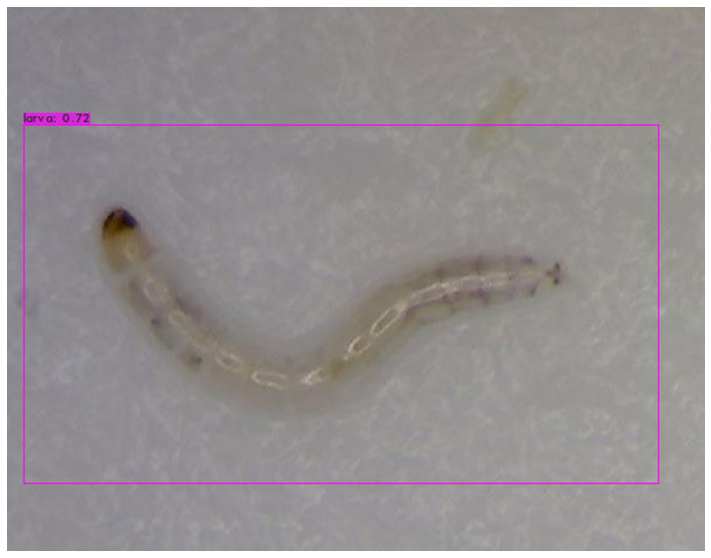

In [ ]:
imShow('predictions.jpg')

In [ ]:
# 2) test.txt 파일의 이미지 한번에 test
# # !./darknet detector test data경로 cfg경로 학습완료된모델경로 -dont_show -ext_output < test.txt경로 > 결과txt파일저장경로
%timeit()

!./darknet detector test /content/drive/MyDrive/yolo3_train/yolo_train/org_1/or1.data /content/drive/MyDrive/yolo_train/org_1/yolov3.cfg /content/drive/MyDrive/yolo3_train/yolo_train/org_1/backup/yolov3_best.weights -dont_show -ext_output < /content/drive/MyDrive/yolo3_train/yolo_train/org_1/o1_test.txt > /content/drive/MyDrive/yolo3_train/yolo_train/org_1/result/larva_test_result.txt

100000000 loops, best of 5: 9.09 ns per loop
 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1  

-------------------------------------------------------